In [ ]:
# Data Source: https://www.kaggle.com/datasets/jessicali9530/honey-production
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

try:
    df = pd.read_csv("./data/honeyproduction.csv")
except Exception as e:
    print("Error loading data:", e)

df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [2]:
# get total production of honey per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [3]:
X = prod_per_year[['year']]
X

,year
0,1998
1,1999
2,2000
3,2001
4,2002
5,2003
6,2004
7,2005
8,2006
9,2007


In [4]:
# convert year column from dataframe to numpy array
X = X.values.reshape(-1, 1)

In [5]:
y = prod_per_year['totalprod']
y

0     5.105093e+06
1     4.706674e+06
2     5.106000e+06
3     4.221545e+06
4     3.892386e+06
5     4.122091e+06
6     4.456805e+06
7     4.243146e+06
8     3.761902e+06
9     3.600512e+06
10    3.974927e+06
11    3.626700e+06
12    4.382350e+06
13    3.680025e+06
14    3.522675e+06
Name: totalprod, dtype: float64

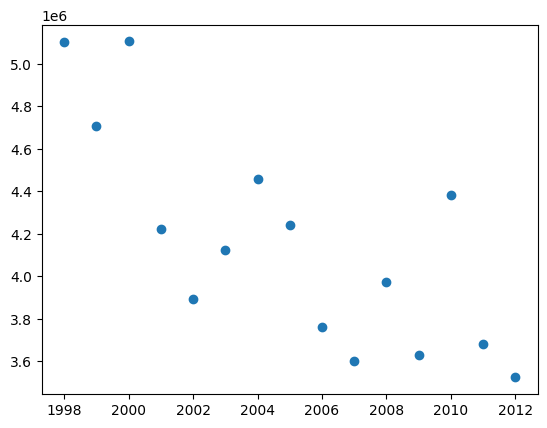

In [6]:
# plot years vs honey production in millions of pounds
plt.scatter(X, y)
plt.show()

In [7]:
# fit model
regr = linear_model.LinearRegression()

In [8]:
regr.fit(X, y)

LinearRegression()

In [9]:
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238192
181208083.10732976


In [10]:
y_predict = regr.predict(X)

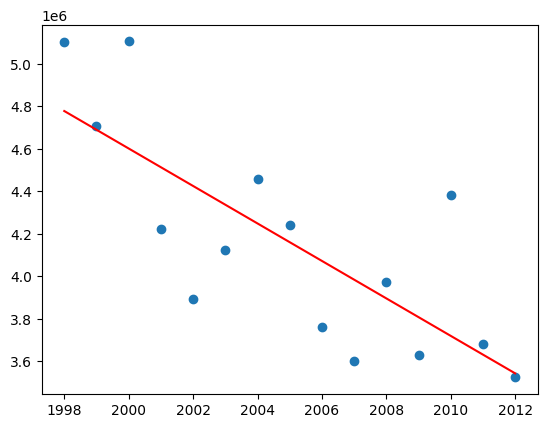

In [ ]:
# plot best fit line on top of data points
plt.scatter(X, y)
plt.plot(X, y_predict, color = 'red')
plt.show()

In [12]:
# create numpy array of future years until 2050
X_future = np.array(range(2013, 2050))
print(X_future)
X_future = X_future.reshape(-1, 1)
print(X_future)

[2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026
 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040
 2041 2042 2043 2044 2045 2046 2047 2048 2049]
[[2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]
 [2031]
 [2032]
 [2033]
 [2034]
 [2035]
 [2036]
 [2037]
 [2038]
 [2039]
 [2040]
 [2041]
 [2042]
 [2043]
 [2044]
 [2045]
 [2046]
 [2047]
 [2048]
 [2049]]


In [13]:
future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919])

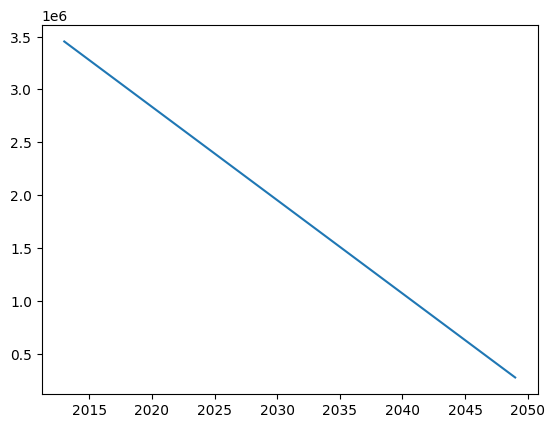

In [14]:
plt.plot(X_future, future_predict)
plt.show()